# Практична сесія - Аналіз і візуалізація даних на основі OpenStreetMap

Мета: навчитися візуалізувати дані, працювати з геоданими та будувати маршрути на основі реальних картографічних даних.

### Частина 1. Візуалізація даних на основі OpenStreetMap


In [1]:
import osmnx as ox
import matplotlib.pyplot as plt

# Завантаження карти Львова
place_name = "Lviv, Ukraine"
G = ox.graph_from_place(place_name, network_type='drive')

/opt/homebrew/anaconda3/envs/data_misc/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


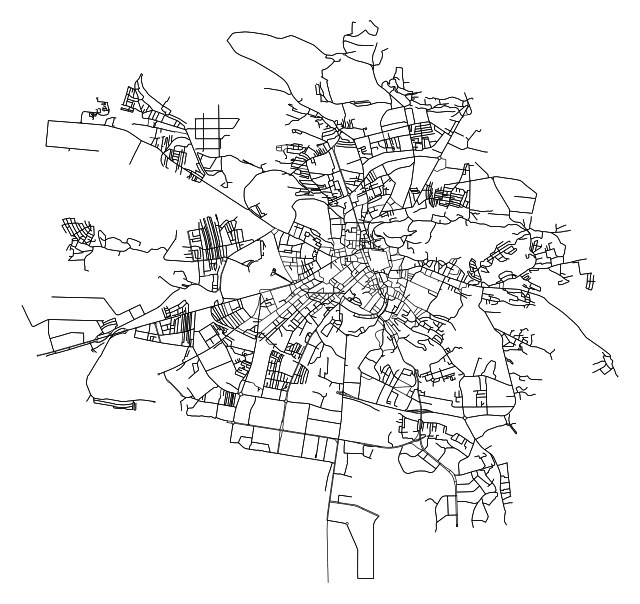

In [2]:
### 1.2 Відобразіть вуличну мережу міста.

fig, ax = ox.plot_graph(G, bgcolor='white', node_color='blue', edge_color='black', node_size=0, edge_linewidth=0.5)
plt.show()

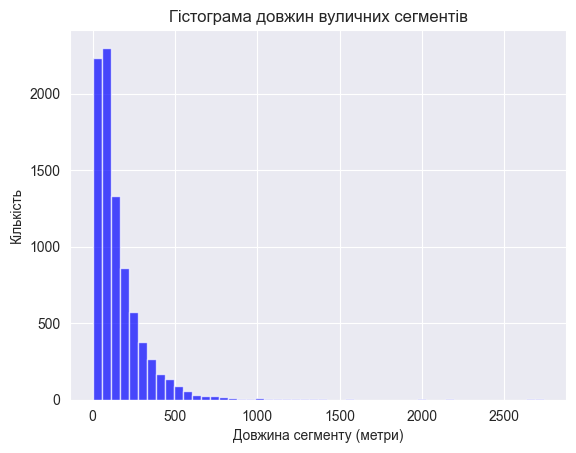

In [3]:
### 1.3 Побудуйте графіки:
### 1.3.1 гістограму довжин вуличних сегментів;

# Отримання довжин вуличних сегментів
edges = ox.graph_to_gdfs(G, nodes=False)
lengths = edges['length']

# Побудова гістограми
plt.hist(lengths, bins=50, color='blue', alpha=0.7)
plt.xlabel('Довжина сегменту (метри)')
plt.ylabel('Кількість')
plt.title('Гістограма довжин вуличних сегментів')
plt.show()

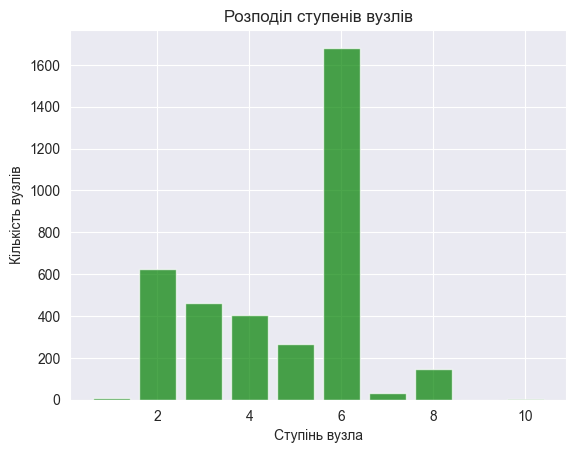

In [4]:
### 1.3.2 Розподіл ступенів вузлів
import pandas as pd

# Обчислення ступенів вузлів
degrees = [degree for node, degree in G.degree()]

# Побудова стовпчикової діаграми
degree_counts = pd.Series(degrees).value_counts().sort_index()
plt.bar(degree_counts.index, degree_counts.values, color='green', alpha=0.7)
plt.xlabel('Ступінь вузла')
plt.ylabel('Кількість вузлів')
plt.title('Розподіл ступенів вузлів')
plt.show()

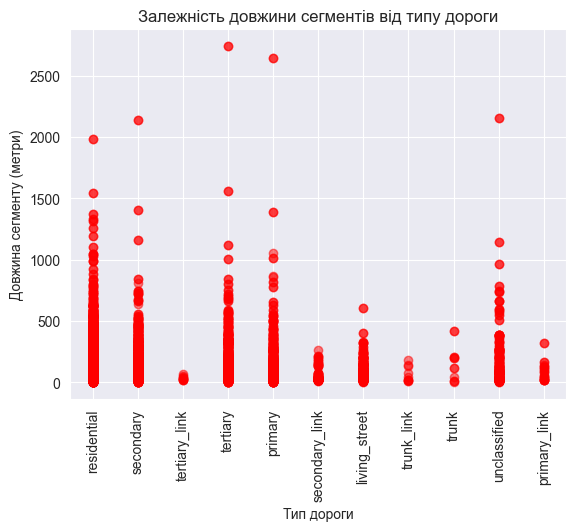

In [5]:
### 1.3.3 Точкова діаграма: довжина vs тип дороги

# Обробка типів доріг (деякі значення можуть бути списками)
edges['highway'] = edges['highway'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Побудова точкової діаграми
plt.scatter(edges['highway'], edges['length'], alpha=0.5, color='red')
plt.xlabel('Тип дороги')
plt.ylabel('Довжина сегменту (метри)')
plt.title('Залежність довжини сегментів від типу дороги')
plt.xticks(rotation=90)
plt.show()

/var/folders/x5/1tfs55m15t1dkv3c6fdlcj640000gn/T/ipykernel_72473/1188076923.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='highway', y='length', data=edges, palette='Set3')


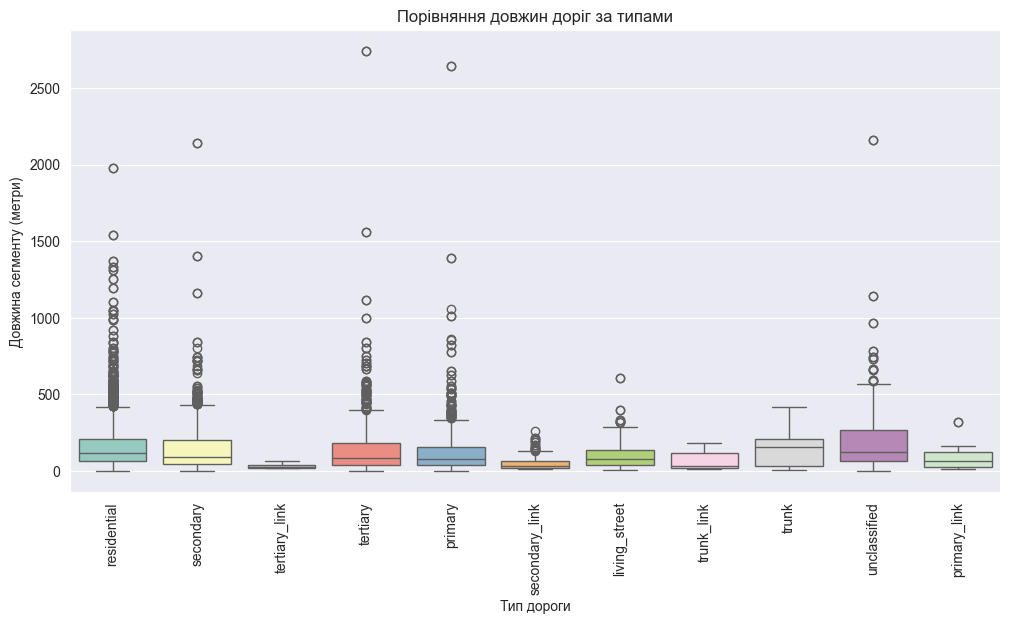

In [6]:
# 1.3.4 Boxplot порівняння довжин за типами
import seaborn as sns

# Побудова boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='highway', y='length', data=edges, palette='Set3')
plt.xlabel('Тип дороги')
plt.ylabel('Довжина сегменту (метри)')
plt.title('Порівняння довжин доріг за типами')
plt.xticks(rotation=90)
plt.show()

# Частина 2. Робота з геоданими
- Завантажте набір просторових даних з OpenStreetMap або створіть його вручну.
- Відобразьте на карті щонайменше три точкові об'єкти (наприклад: вокзал, університет, музей).
- Побудуйте просту карту з геометричними об'єктами на основі координат за допомогою відповідних інструментів.
- Візуалізуйте отримані дані на тлі міської карти.



In [7]:
import folium

# Координати об'єктів (приблизні)
objects = {
    'Вокзал': (49.8406, 24.0156),
    'Університет': (49.8407, 24.0220),
    'Музей': (49.8420, 24.0316)
}

# Створення карти
m = folium.Map(location=[49.8419, 24.0315], zoom_start=14)

# Додавання маркерів
for name, coord in objects.items():
    folium.Marker(location=coord, popup=name).add_to(m)

# Відображення карти в Colab
m

#Частина 3. Побудова маршрутів
- Виберіть два довільні об’єкти на мапі (наприклад, вокзал і театр).
- Побудуйте найкоротший маршрут між ними.
- Відобразіть цей маршрут на карті.
- Побудуйте щонайменше два альтернативні маршрути та порівняйте їх довжину.


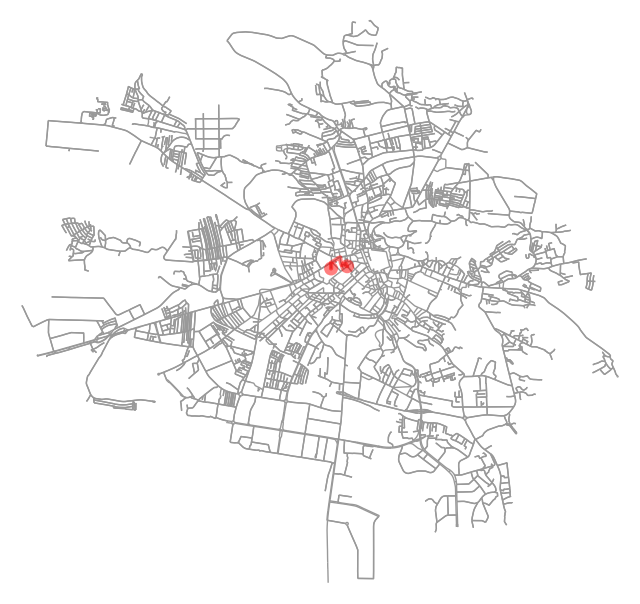

In [8]:
# Отримання найближчих вузлів до об'єктів
orig_node = ox.distance.nearest_nodes(G, objects['Вокзал'][1], objects['Вокзал'][0])
dest_node = ox.distance.nearest_nodes(G, objects['Університет'][1], objects['Університет'][0])

# Побудова найкоротшого шляху
route = ox.shortest_path(G, orig_node, dest_node, weight='length')

# Відображення маршруту на карті
fig, ax = ox.plot_graph_route(G, route, route_color='red', route_linewidth=3, node_size=0, bgcolor='white')
plt.show()

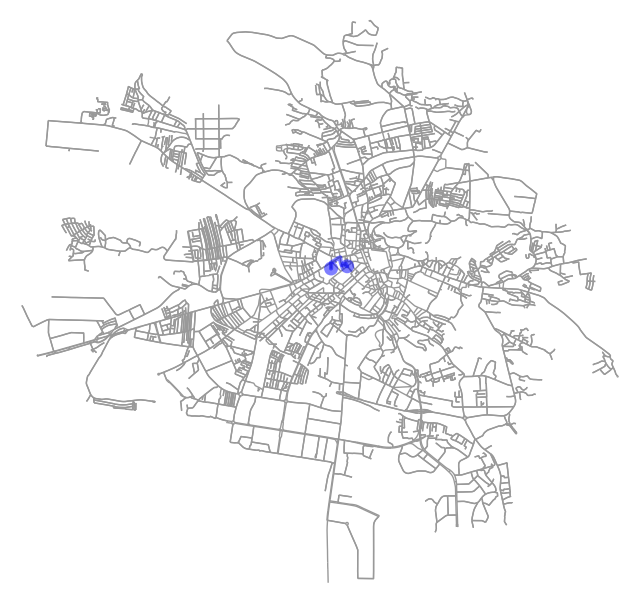

Довжина оригінального маршруту: 793.40 метрів
Довжина альтернативного маршруту: 793.40 метрів


In [9]:
import osmnx as ox
import matplotlib.pyplot as plt

# Побудова альтернативного маршруту
G_alt = ox.graph_from_place(place_name, network_type='drive')
for u, v, k, data in G_alt.edges(keys=True, data=True):
    if data.get('highway') == 'trunk':  # Уникаємо магістралей
        data['length'] *= 100  # Збільшуємо вагу магістралей

route_alt = ox.shortest_path(G_alt, orig_node, dest_node, weight='length')

# Відображення альтернативного маршруту
fig, ax = ox.plot_graph_route(G_alt, route_alt, route_color='blue', route_linewidth=3, node_size=0, bgcolor='white')
plt.show()

# Порівняння довжин
# Convert routes to GeoDataFrames to get edge attributes
route_gdf = ox.routing.route_to_gdf(G, route)
route_alt_gdf = ox.routing.route_to_gdf(G_alt, route_alt)

# Calculate lengths by summing the 'length' column
length_original = route_gdf['length'].sum()
length_alt = route_alt_gdf['length'].sum()

print(f'Довжина оригінального маршруту: {length_original:.2f} метрів')
print(f'Довжина альтернативного маршруту: {length_alt:.2f} метрів')

Частина 4. Оптимізація маршруту (задача комівояжера)
- Виберіть 10 історико-культурних об’єктів у місті.
- Розрахуйте оптимальний маршрут, що починається і закінчується на вокзалі та проходить через усі об’єкти.
- Відобразіть цей маршрут на карті міста.
- Порівняйте довжину маршруту з довільним (неоптимізованим) порядком проходження точок.

In [13]:
from networkx.algorithms import approximation as approx
import random
import networkx as nx
import itertools

# 1. Завантажуємо граф вулиць Львова
G = ox.graph_from_place("Lviv, Ukraine", network_type="drive")

# 2. Координати вокзалу + 9 реальних історико-культурних об’єктів Львова
objects_10 = {
    "Вокзал":                        (49.8406, 24.0156),
    "Площа Ринок":                   (49.8424, 24.0316),
    "Латинський кафедральний собор": (49.8409, 24.0332),
    "Вірменський собор":             (49.8417, 24.0332),
    "Каплиця Боїмів":                (49.8421, 24.0327),
    "Домініканський собор":          (49.8430, 24.0268),
    "Оперний театр":                 (49.8423, 24.0312),
    "Палац Потоцьких":               (49.84095, 24.02725),
    "Високий Замок":                 (49.84724, 24.03549),
    "Пам'ятник Івану Франку":        (49.83968, 24.02785),
}

# 3. Прив’язуємо кожен POI до найближчого вузла OSMnx
nodes = {
    name: ox.distance.nearest_nodes(G, X=lon, Y=lat)
    for name, (lat, lon) in objects_10.items()
}

# 4. Будуємо повний граф відстаней між усіма POI
tsp_graph = nx.Graph()
for u, v in itertools.combinations(objects_10, 2):
    d = nx.shortest_path_length(G, nodes[u], nodes[v], weight="length")
    tsp_graph.add_edge(u, v, weight=d)

# 5. Розв’язуємо задачу комівояжера (Christofides approximation)
cycle = approx.traveling_salesman_problem(tsp_graph, cycle=True, weight="weight")

# 6. Ротейтуємо цикл, щоб починати/закінчувати на вокзалі
start = "Вокзал"
i0 = cycle.index(start)
cycle = cycle[i0:] + cycle[1:i0+1]

# 7. Реконструюємо повний маршрут у графі OSMnx
full_route = []
for a, b in zip(cycle[:-1], cycle[1:]):
    path = nx.shortest_path(G, nodes[a], nodes[b], weight="length")
    full_route.extend(path[:-1])
full_route.append(nodes[start])

# 8. Створюємо інтерактивну карту Folium і додаємо маршрут і маркери
# Центруємо карту на вокзалі
m = folium.Map(location=objects_10[start], zoom_start=13)

# Додаємо лінію маршруту
route_coords = [(G.nodes[n]["y"], G.nodes[n]["x"]) for n in full_route]
folium.PolyLine(route_coords, color="green", weight=5, opacity=0.7).add_to(m)

# Додаємо маркери для всіх POI
for name, (lat, lon) in objects_10.items():
    folium.Marker([lat, lon], popup=name).add_to(m)

# Виводимо карту
m

In [11]:
# 9. Порівняння з довільним маршрутом
names = list(objects_10.keys())
rand_seq = [start] + random.sample(names[1:], len(names)-1) + [start]
random_length = sum(
    nx.shortest_path_length(G, nodes[a], nodes[b], weight="length")
    for a, b in zip(rand_seq[:-1], rand_seq[1:])
)
tsp_length = sum(
    nx.shortest_path_length(G, nodes[a], nodes[b], weight="length")
    for a, b in zip(cycle[:-1], cycle[1:])
)

print(f"Довжина довільного маршруту:     {random_length:.2f} м")
print(f"Довжина оптимізованого маршруту: {tsp_length:.2f} м")

Довжина довільного маршруту:     12331.41 м
Довжина оптимізованого маршруту: 7959.93 м


In [12]:
import folium

# 1. Вибір п'яти об'єктів для маркерів
poi_names = [
    "Вокзал",
    "Площа Ринок",
    "Латинський кафедральний собор",
    "Вірменський собор",
    "Оперний театр",
]

# 2. Ініціалізація карти, центр — вокзал
start_coord = objects_10["Вокзал"]
m = folium.Map(location=start_coord, zoom_start=14)

# 3. Додаємо маркери з підписами
for name in poi_names:
    lat, lon = objects_10[name]
    folium.Marker(
        location=(lat, lon),
        popup=name,
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

# 4. Додаємо лінію оптимального маршруту
route_coords = [(G.nodes[n]["y"], G.nodes[n]["x"]) for n in full_route]
folium.PolyLine(
    locations=route_coords,
    color="blue",
    weight=4,
    opacity=0.7,
    tooltip="Оптимальний маршрут"
).add_to(m)

# 5. Зберігаємо карту в HTML
m.save("lviv_tsp_map.html")
print("Карту збережено у файлі lviv_tsp_map.html")

m

Карту збережено у файлі lviv_tsp_map.html
